In [1]:
# You can run this script and see the results. Example output is also included
# for each question. Note that there is randomness involved (both in how the
# data is split and also in the Random Forest), so you will not always get
# exactly the same results.


from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_score, recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from roc import plot_roc
plt.style.use('ggplot')

In [2]:
# 1. Load the dataset in with pandas
df = pd.read_csv('./data/churn.csv')

In [3]:
# 2. Convert the "no", "yes" values to booleans (True/False)
df["Int'l Plan"] = df["Int'l Plan"] == 'yes'
df["VMail Plan"] = df["VMail Plan"] == 'yes'
df['Churn?'] = df['Churn?'] == 'True.'

In [4]:
# 3. Remove the features which aren't continuous or boolean
df.pop('State')
df.pop('Area Code')
df.pop('Phone')

0       382-4657
1       371-7191
2       358-1921
3       375-9999
4       330-6626
          ...   
3328    414-4276
3329    370-3271
3330    328-8230
3331    364-6381
3332    400-4344
Name: Phone, Length: 3333, dtype: object

In [5]:
# 4. Make a numpy array called y containing the churn values
y = df.pop('Churn?').values

In [6]:
# 5. Make a 2 dimensional numpy array containing the feature data (everything except the labels)
X = df.values

In [7]:
# 6. Use sklearn's train_test_split to split into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [8]:
# 7. Use sklearn's RandomForestClassifier to build a model of your data
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [9]:
# 8. What is the accuracy score on the test data?
print("\n8. score:", rf.score(X_test, y_test))
## answer: 0.9448441247


8. score: 0.9544364508393285


In [10]:
# 9. Draw a confusion matrix for the results
y_predict = rf.predict(X_test)
print("\n9. confusion matrix:")
print(confusion_matrix(y_test, y_predict))


9. confusion matrix:
[[722   4]
 [ 34  74]]


In [11]:
# 10. What is the precision? Recall?
print("\n10. precision:", precision_score(y_test, y_predict))
print("    recall:", recall_score(y_test, y_predict))


10. precision: 0.9487179487179487
    recall: 0.6851851851851852


In [12]:
# 11. Build the RandomForestClassifier again setting the out of bag parameter to be true
rf = RandomForestClassifier(n_estimators=30, oob_score=True)
rf.fit(X_train, y_train)
print("\n11: accuracy score:", rf.score(X_test, y_test))
print("    out of bag score:", rf.oob_score_)
##   accuracy score: 0.953237410072
## out of bag score: 0.946778711485   (out-of-bag error is slightly worse)


11: accuracy score: 0.9520383693045563
    out of bag score: 0.9407763105242097


In [13]:
# 12. Use sklearn's model to get the feature importances
feature_importances = np.argsort(rf.feature_importances_)
print("\n12: top five:", list(df.columns[feature_importances[-1:-6:-1]]))
## top five: ['Day Mins', 'CustServ Calls', 'Day Charge', "Int'l Plan", 'Eve Mins']
## (will vary a little)


12: top five: ['Day Mins', 'Day Charge', 'CustServ Calls', "Int'l Plan", 'Eve Charge']



13. Feature ranking:
1. Day Mins (0.154525)
2. Day Charge (0.144071)
3. Int'l Plan (0.082047)
4. Eve Charge (0.070066)
5. Eve Mins (0.068467)
6. Account Length (0.033262)
7. Day Calls (0.029225)
8. VMail Message (0.027751)
9. Eve Calls (0.026017)
10. VMail Plan (0.022516)


Text(0.5, 1.0, 'Feature Importances')

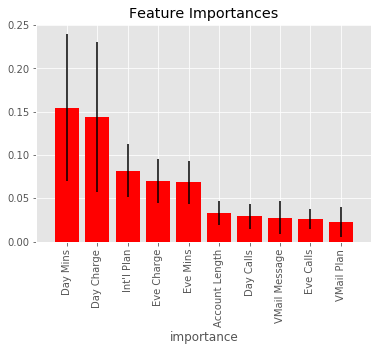

In [14]:
# 13. Calculate the standard deviation for feature importances across all trees

n = 10 # top 10 features

#importances = forest_fit.feature_importances_[:n]
importances = rf.feature_importances_[:n]
std = np.std([tree.feature_importances_ for tree in rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
features = list(df.columns[indices])

# Print the feature ranking
print("\n13. Feature ranking:")

for f in range(n):
    print("%d. %s (%f)" % (f + 1, features[f], importances[indices[f]]))

# Plot the feature importances of the forest
fig, ax = plt.subplots()

ax.bar(range(10), importances[indices], yerr=std[indices], color="r", align="center")
ax.set_xticks(range(10))
ax.set_xticklabels(features, rotation = 90)
ax.set_xlim([-1, 10])
ax.set_xlabel("importance")
ax.set_title("Feature Importances")


Text(0.5, 1.0, 'Accuracy vs Num Trees')

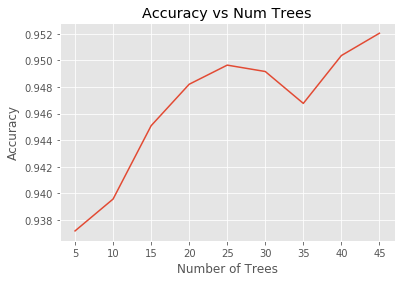

In [15]:
# 14. Try modifying the number of trees
num_trees = range(5, 50, 5)
accuracies = []
for n in num_trees:
    tot = 0
    for i in range(5):
        rf = RandomForestClassifier(n_estimators=n)
        rf.fit(X_train, y_train)
        tot += rf.score(X_test, y_test)
    accuracies.append(tot / 5)
fig, ax = plt.subplots()
ax.plot(num_trees, accuracies)
ax.set_xlabel("Number of Trees")
ax.set_ylabel("Accuracy")
ax.set_title('Accuracy vs Num Trees')


Text(0.5, 1.0, 'Accuracy vs Num Features')

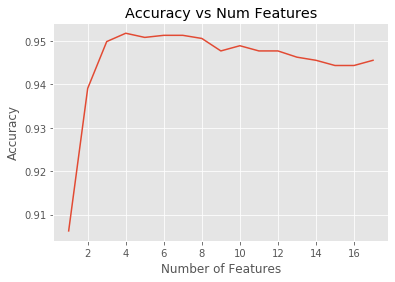

In [16]:
# 15. Try modifying the max features parameter
num_features = range(1, len(df.columns) + 1)
accuracies = []
for n in num_features:
    tot = 0
    for i in range(5):
        rf = RandomForestClassifier(max_features=n)
        rf.fit(X_train, y_train)
        tot += rf.score(X_test, y_test)
    accuracies.append(tot / 5)
fig, ax = plt.subplots()
ax.plot(num_features, accuracies)
ax.set_xlabel("Number of Features")
ax.set_ylabel("Accuracy")
ax.set_title('Accuracy vs Num Features')

## Levels off around 5-6

In [17]:
# 16. Run all the other classifiers that we have learned so far in class
def get_scores(classifier, X_train, X_test, y_train, y_test, **kwargs):
    model = classifier(**kwargs)
    model.fit(X_train, y_train)
    y_predict = model.predict(X_test)
    return model.score(X_test, y_test), \
           precision_score(y_test, y_predict), \
           recall_score(y_test, y_predict)

print("\n16. Model, Accuracy, Precision, Recall")
print("    Random Forest:", get_scores(RandomForestClassifier, X_train, X_test, y_train, y_test, n_estimators=25, max_features=5))
print("    Logistic Regression:", get_scores(LogisticRegression, X_train, X_test, y_train, y_test))
print("    Decision Tree:", get_scores(DecisionTreeClassifier, X_train, X_test, y_train, y_test))
print("    Naive Bayes:", get_scores(MultinomialNB, X_train, X_test, y_train, y_test))
## MODEL               ACCURACY PRECISION    RECALL
## Random Forest         0.9508    0.8817    0.7321
## Logistic Regression   0.8741    0.6129    0.1696
## Decision Tree         0.9209    0.6949    0.7321


16. Model, Accuracy, Precision, Recall
    Random Forest: (0.9436450839328537, 0.8961038961038961, 0.6388888888888888)
    Logistic Regression: (0.8669064748201439, 0.4117647058823529, 0.06481481481481481)
    Decision Tree: (0.9112709832134293, 0.660377358490566, 0.6481481481481481)
    Naive Bayes: (0.6306954436450839, 0.19325153374233128, 0.5833333333333334)


/home/pkgalea/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


17. Use the included `plot_roc` function to visualize the roc curve of each model


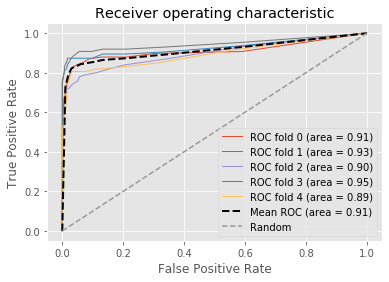

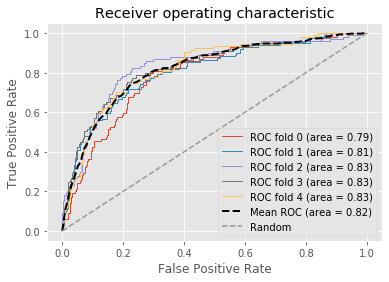

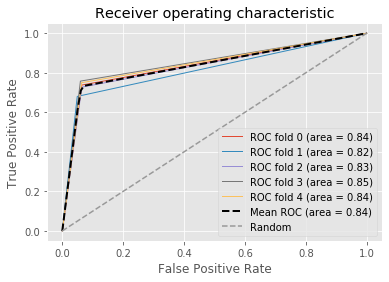

In [18]:
print("17. Use the included `plot_roc` function to visualize the roc curve of each model")
plot_roc(X, y, RandomForestClassifier, 'Random_Forest', n_estimators=25, max_features=5)
plot_roc(X, y, LogisticRegression, 'Logistic_Regression')
plot_roc(X, y, DecisionTreeClassifier, 'Decision_Tree')
#plot_roc(X, y, MultinomialNB, 'Naive_Bayes') 
